Curso de manejo de datos faltantes

Profesor: Jesús Vélez

# Configuración de ambiente de trabajo

- Actualizar e instalar librerías

!pip install --upgrade pip

!pip install pyjanitor matplotlib missingno numpy pandas pyreadr seaborn session-info upsetplot

Estas lineas se ejecutarán de manera automática al iniciar este notebook en Deepnote, ya que requeriments.txt se instalará de manera automática al iniciar el entorno

## Importar libreras

In [1]:
import janitor
import matplotlib.pyplot as plt
import missingno
import numpy as np
import pandas as pd
import pyreadr
import seaborn as sns
import session_info
import upsetplot

/root/venv/lib/python3.9/site-packages/upsetplot/plotting.py:15: MatplotlibDeprecationWarning: The matplotlib.tight_layout module was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  from matplotlib.tight_layout import get_renderer


## Configuración de aspecto de las gráficas

In [2]:
%matplotlib inline

sns.set(
    rc={
        "figure.figsize": (10, 10)
    }
)

sns.set_style("whitegrid")

# Operaciones con valores faltantes

## Python

## NumPy

In [3]:
print(
    None or True,
    None or False,
    None == None,
    None is None,
    #None + True, #TypeError: unsupported operand type(s) for +: 'NoneType' and 'bool'
    #None / False, #TypeError: unsupported operand type(s) for /: 'NoneType' and 'bool'
    type(None),
    sep="\n"
)

True
False
True
True
<class 'NoneType'>


In [4]:
print(
    np.nan or True,
    np.nan or False,
    np.nan == np.nan,
    np.nan is np.nan,
    np.nan / 2,
    np.nan * 7,
    type(np.nan),
    np.isnan(np.nan),
    sep="\n"
)

nan
nan
False
True
nan
nan
<class 'float'>
True


## Pandas

In [5]:
test_missing_df = pd.DataFrame.from_dict(
    data=dict(
        x=[0, 1, np.nan, np.nan, None],
        y=[0, 1, pd.NA, np.nan, None]
    )
)

test_missing_df

,x,y
0,0.0,0
1,1.0,1
2,NaN,<NA>
3,NaN,NaN
4,NaN,None


In [6]:
test_missing_df.isna()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [7]:
test_missing_df.isnull()

,x,y
0,False,False
1,False,False
2,True,True
3,True,True
4,True,True


In [8]:
pd.Series([pd.to_datetime("2022-01-01"), np.nan])

0   2022-01-01
1          NaT
dtype: datetime64[ns]

In [9]:
pd.Series([-1]).isnull()

0    False
dtype: bool

# Cargando los conjuntos de datos

## Pima Indian Diabetes Dataset

In [10]:
pima_indians_diabetes_url = "https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv"

Utilizamos el siguiente comando para realizar la descarga de los archivos

In [11]:
!wget -O /work/data/pima-indians-diabetes.csv { pima_indians_diabetes_url } -q

In [12]:
diabetes_df = pd.read_csv(
    filepath_or_buffer="/work/data/pima-indians-diabetes.csv", # or pima_indians_diabetes_url
    sep=",",
    names=[
        "pregnancies",
        "glucose",
        "blood_pressure",
        "skin_thickness",
        "insulin",
        "bmi",
        "diabetes_pedigree_function",
        "age",
        "outcome",
    ]
)

diabetes_df

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


## naniar (oceanbuoys, pedestrian, riskfactors)

In [13]:
base_url = "https://github.com/njtierney/naniar/raw/master/data/"
datasets_names = ("oceanbuoys", "pedestrian", "riskfactors")
extension = ".rda"

In [14]:
datasets_dfs = {}

for dataset_name in datasets_names:

    dataset_file = f"{ dataset_name }{ extension }"
    dataset_output_file = f"./data/{ dataset_file }"
    dataset_url = f"{ base_url }{ dataset_file }"
    
    !wget -q -O { dataset_output_file } { dataset_url }

    datasets_dfs[f"{ dataset_name }_df"] = pyreadr.read_r(dataset_output_file).get(dataset_name)

datasets_dfs.keys()

dict_keys(['oceanbuoys_df', 'pedestrian_df', 'riskfactors_df'])

## Incluir los datasets al entorno local

In [15]:
locals().update(**datasets_dfs)
del datasets_dfs

## Verificar la carga

In [16]:
oceanbuoys_df.shape, pedestrian_df.shape, riskfactors_df.shape, diabetes_df.shape

((736, 8), (37700, 9), (245, 34), (769, 9))

# Tabulación de datos faltantes

<hr>

> Extensión de la librería Pandas

Para las siguientes secciones, podemos hacer uso de las extensiones para la librería de pandas brindadas, las cuales están contenidas en la siguiente notebook

In [17]:
%run pandas-missing-extension.ipynb #La extensión tendrá por nombre "missing"

<hr>

In [18]:
riskfactors_df.isna()

,state,sex,age,weight_lbs,height_inch,bmi,marital,pregnant,children,education,...,smoke_100,smoke_days,smoke_stop,smoke_last,diet_fruit,diet_salad,diet_potato,diet_carrot,diet_vegetable,diet_juice
0,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
241,False,False,False,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,False,False
242,False,False,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
243,False,False,False,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,False,False


## Resúmenes básicos de valores faltantes

riskfactors_df.shape

riskfactors_df.missing.number_complete()

riskfactors_df.missing.number_missing()

riskfactors_df.missing.missing_variable_summary()

riskfactors_df.missing.missing_variable_table()

riskfactors_df.missing.missing_case_summary()

riskfactors_df.missing.missing_case_table()

(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable="weight_lbs",
        span_every=50
    )
)

(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable="weight_lbs"
    )
)


In [19]:
#Cantidad de (Registos, Variabbles) en nuestro dataset 
riskfactors_df.shape

(245, 34)

In [20]:
#Cantidad de "variables"
len(riskfactors_df.columns)

34

In [21]:
#Nombre de las variables
riskfactors_df.columns

Index(['state', 'sex', 'age', 'weight_lbs', 'height_inch', 'bmi', 'marital',
       'pregnant', 'children', 'education', 'employment', 'income', 'veteran',
       'hispanic', 'health_general', 'health_physical', 'health_mental',
       'health_poor', 'health_cover', 'provide_care', 'activity_limited',
       'drink_any', 'drink_days', 'drink_average', 'smoke_100', 'smoke_days',
       'smoke_stop', 'smoke_last', 'diet_fruit', 'diet_salad', 'diet_potato',
       'diet_carrot', 'diet_vegetable', 'diet_juice'],
      dtype='object')

<hr>

In [22]:
riskfactors_df.missing.number_missing()

1186

> Versión pura en Pandas

In [23]:
riskfactors_df.isna().sum().sum()

1186

El primer .sum() da como resultado la cantidad de nulos en cada columna y entrega la tabla de columna:nulos -> Aplicar un segundo .sum() sumará todas las cantidades de cada columna para entregar la cantidad de elementos totales faltantes a lo largo de todo el dataset.

<hr>

In [24]:
#Cantidad de elementos de nuestro dataset que no son vacios
riskfactors_df.missing.number_complete()

7144

> Versión pura en Pandas

In [25]:
riskfactors_df.size - riskfactors_df.isna().sum().sum()

7144

<hr>

In [26]:
'''
La función missing_variable_summary devuelve un DataFrame que contiene 
un resumen de las variables faltantes en el DataFrame original. 
Este resumen incluye el número de valores faltantes y el porcentaje de 
valores faltantes para cada variable.
'''
riskfactors_df.missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


> Versión pura en Pandas

In [27]:
riskfactors_df.isnull().pipe(
    # Usa pipe para encadenar operaciones de manera más legible
    lambda df_1: (
        # Suma los valores True en cada columna para contar los valores faltantes
        df_1.sum()
        # Convierte el índice en una columna y nombra la nueva columna como "n_missing"
        .reset_index(name="n_missing")
        # Renombra la columna "index" a "variable"
        .rename(columns={"index": "variable"})
        # Asigna nuevas columnas al DataFrame
        .assign(
            # n_cases: Número total de filas en el DataFrame original
            n_cases=len(df_1),
            # pct_missing: Porcentaje de valores faltantes para cada variable
            pct_missing=lambda df_2: df_2.n_missing / df_2.n_cases * 100,
        )
    )
)

,variable,n_missing,n_cases,pct_missing
0,state,0,245,0.000000
1,sex,0,245,0.000000
2,age,0,245,0.000000
3,weight_lbs,10,245,4.081633
4,height_inch,2,245,0.816327
5,bmi,11,245,4.489796
6,marital,1,245,0.408163
7,pregnant,215,245,87.755102
8,children,0,245,0.000000
9,education,1,245,0.408163


<hr>

In [28]:
#CODIGO NO FUNCIONANDO DESDE LAS LLAMADAS A LA EXTENSION...

#riskfactors_df.missing.missing_variable_table()

In [29]:
riskfactors_df.missing.missing_variable_summary().value_counts("n_missing").reset_index().rename(
    columns={"n_missing": "n_missing_in_variable", 
    "count": "n_variables"}).assign(
        pct_variables=lambda df: df.n_variables / df.n_variables.sum() * 100
        ).sort_values("pct_variables", 
        ascending=False)

,n_missing_in_variable,n_variables,pct_variables
0,0,10,29.411765
1,8,6,17.647059
2,2,4,11.764706
3,3,3,8.823529
4,1,2,5.882353
5,10,1,2.941176
6,11,1,2.941176
7,113,1,2.941176
8,128,1,2.941176
9,134,1,2.941176


In [30]:
#En cada linea se muestra el registro correspondiente, la cantidad de variables faltantes 
#y el porcentaje de valores faltantes que corresponde en la totalidad del dataset.
riskfactors_df.missing.missing_case_summary()

,case,n_missing,pct_missing
0,0,6,16.666667
1,1,6,16.666667
2,2,7,19.444444
3,3,12,33.333333
4,4,5,13.888889
...,...,...,...
240,240,6,16.666667
241,241,5,13.888889
242,242,3,8.333333
243,243,2,5.555556


In [31]:
#riskfactors_df.missing.missing_case_table()

AttributeError: 'DataFrame' object has no attribute 'n_cases'

In [32]:
#El siguiente código mostrará:
#la cantidad de variables que faltan -> en cuántos casos -> y el porcentaje que representan
riskfactors_df.missing.missing_case_summary().value_counts("n_missing").reset_index().rename(
    columns={"n_missing": 
    "n_missing_in_case", 
    "count": "n_cases"}).assign(
        pct_case=lambda df: df.n_cases / df.n_cases.sum() * 100
        ).sort_values("pct_case", ascending=False)

,n_missing_in_case,n_cases,pct_case
0,4,49,20.000000
1,5,45,18.367347
2,7,39,15.918367
3,6,36,14.693878
4,2,31,12.653061
5,3,30,12.244898
6,1,4,1.632653
7,8,3,1.224490
8,12,3,1.224490
9,15,2,0.816327


In [36]:
#La siguiente función creará grupos de tamaño del 'span' dado.
#En este caso, el span es de 50 -> grupos de 50 registros
#Además, se usará la variable 'weight_lbs' para identificar si el dato es faltante
#Entonces, se obtendra un resumen de los grupos de 50 y cuántos valores faltantes hay en cada grupo
(
    riskfactors_df
    .missing
    .missing_variable_span(
        variable="weight_lbs",
        span_every=50
    )
)

,span_counter,n_missing,n_complete,pct_missing,pct_complete
0,0,1,49,2.000000,98.000000
1,1,5,45,10.000000,90.000000
2,2,1,49,2.000000,98.000000
3,3,1,49,2.000000,98.000000
4,4,2,43,4.444444,95.555556


Sugerencia: Utilizar esta misma lógica para crear una función que muestre de manera visual el resultado para identificar si existe una distribución de los datos faltantes de manera agrupada

In [37]:
#Esta función mostrará la cantidad de registros sin elementos faltantes, antes de que aparezca n-anomalias
#que poseen datos faltantes
(
    riskfactors_df
    .missing
    .missing_variable_run(
        variable="weight_lbs"
    )
)

,run_length,is_na
0,14,complete
1,1,missing
2,45,complete
3,1,missing
4,5,complete
5,1,missing
6,12,complete
7,1,missing
8,10,complete
9,2,missing


# Visualización de datos faltantes

## Visualización en función de cada variable por separado

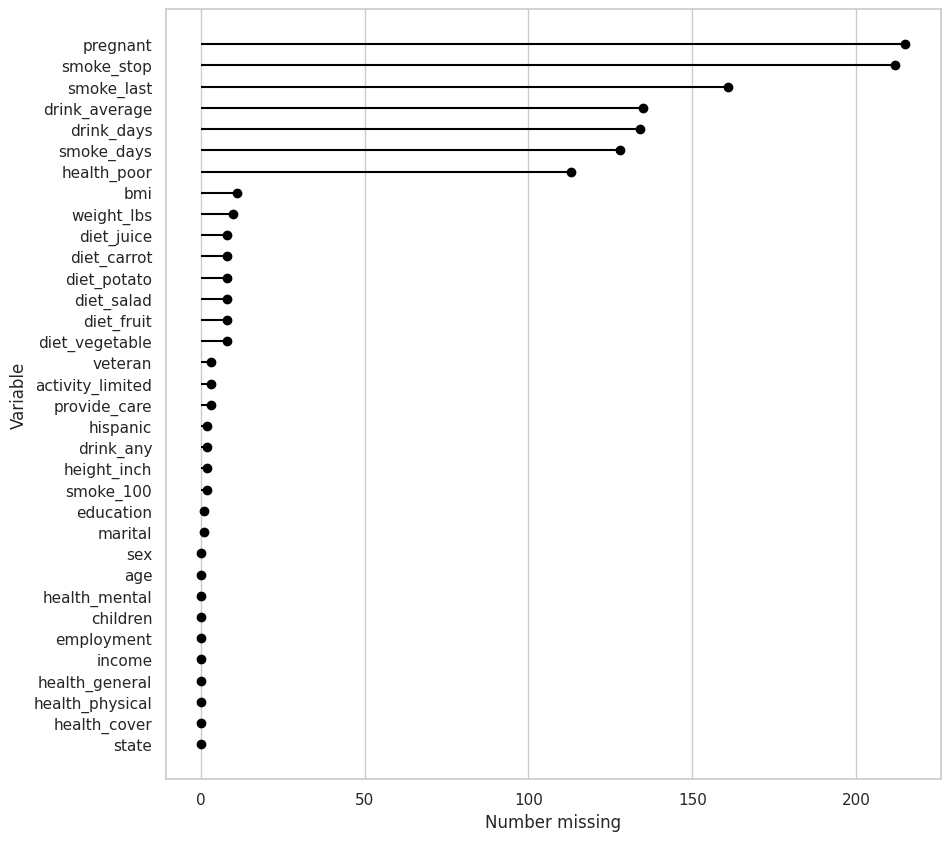

In [39]:
riskfactors_df.missing.missing_variable_plot()

## Visualización por caso/columna/fila 

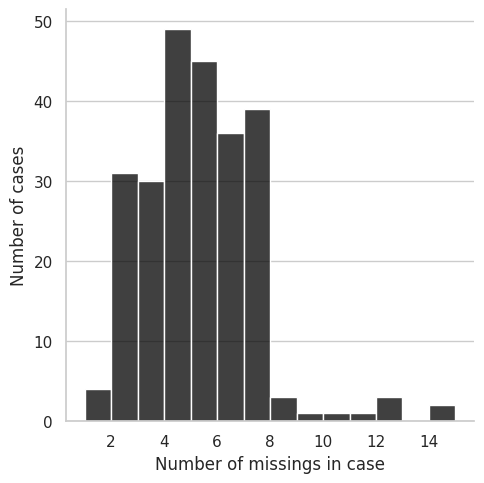

In [40]:
riskfactors_df.missing.missing_case_plot()

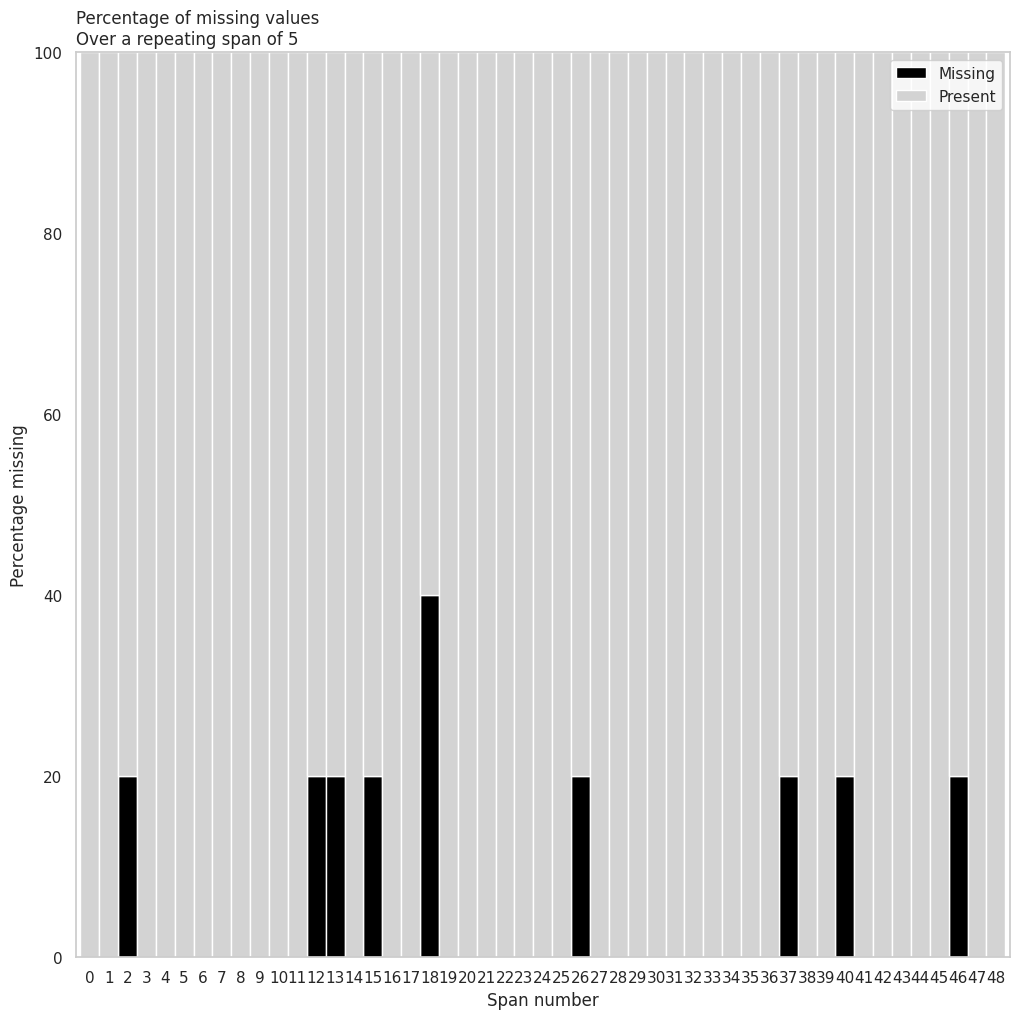

In [43]:
(
    riskfactors_df
    .missing
    .missing_variable_span_plot(
        variable="weight_lbs",
        span_every=5,
        rot = 0
    )
)

<AxesSubplot: >

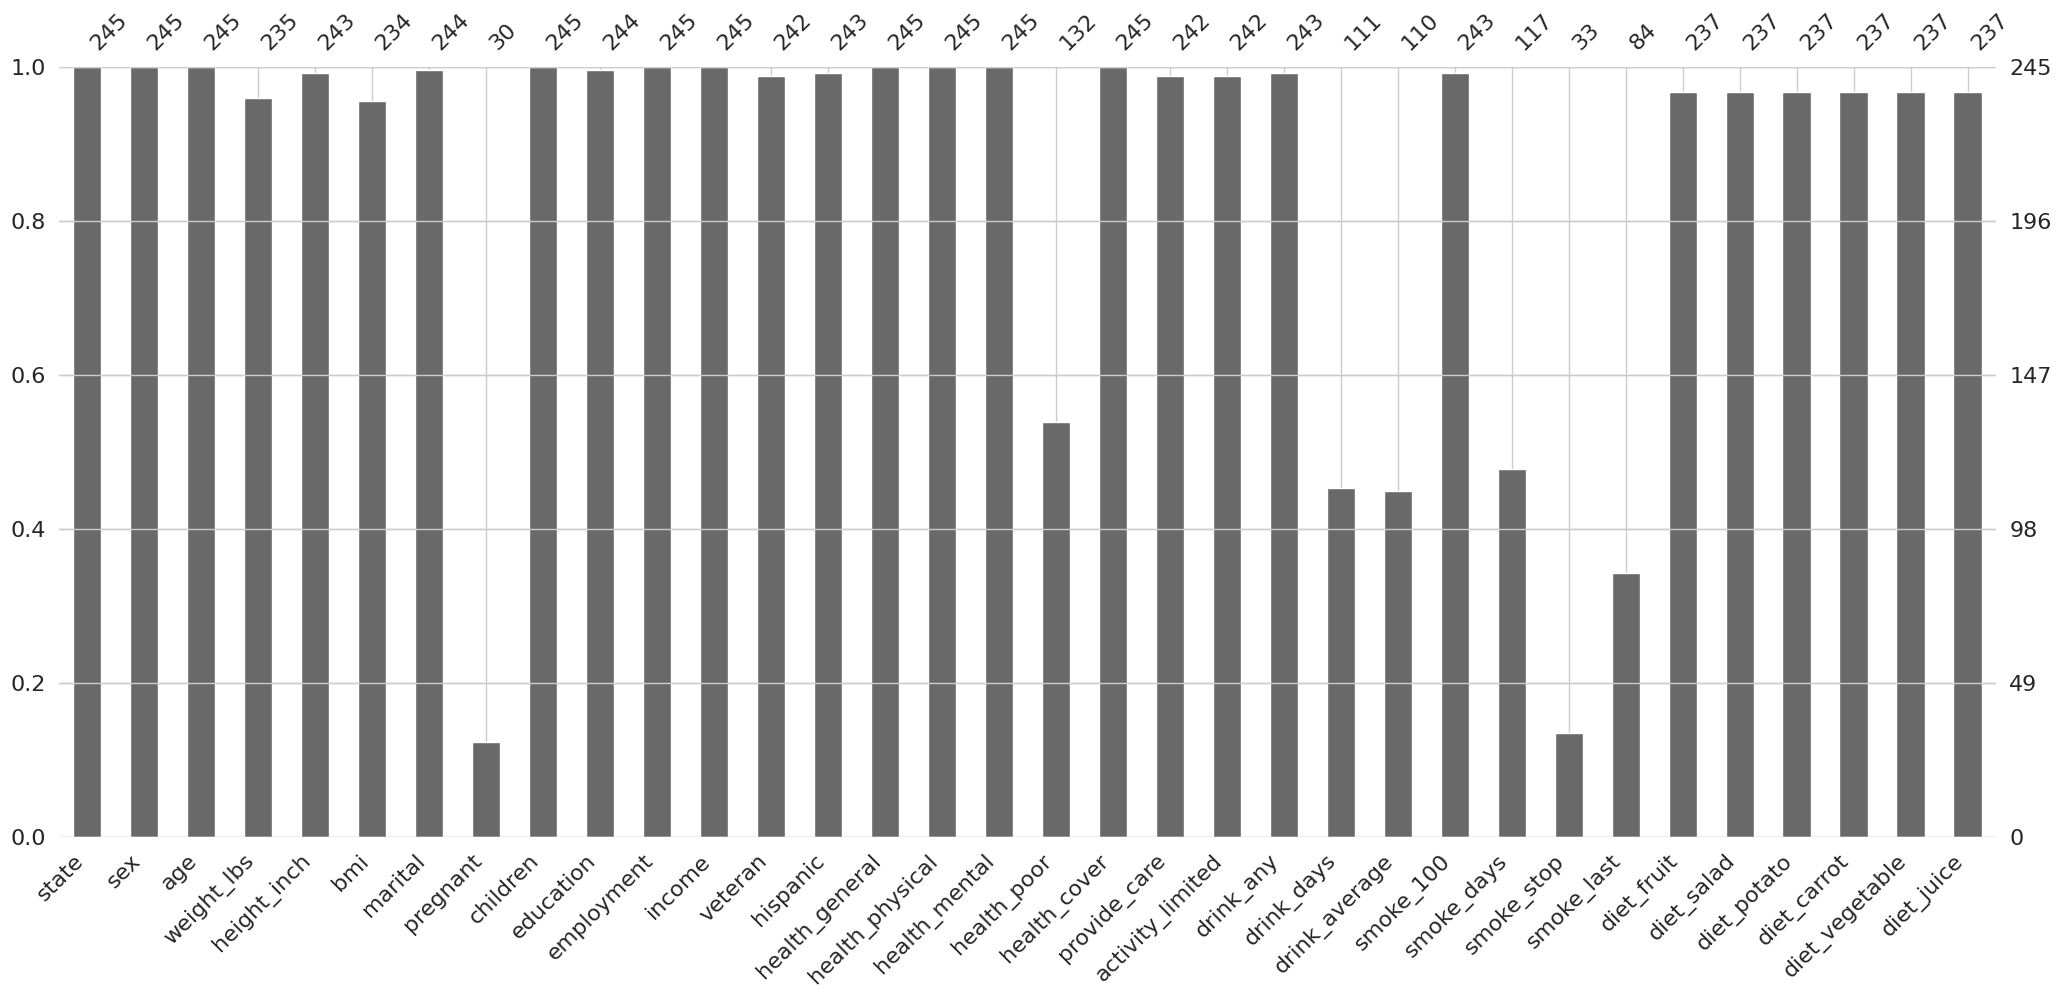

In [44]:
missingno.bar(riskfactors_df)

<AxesSubplot: >

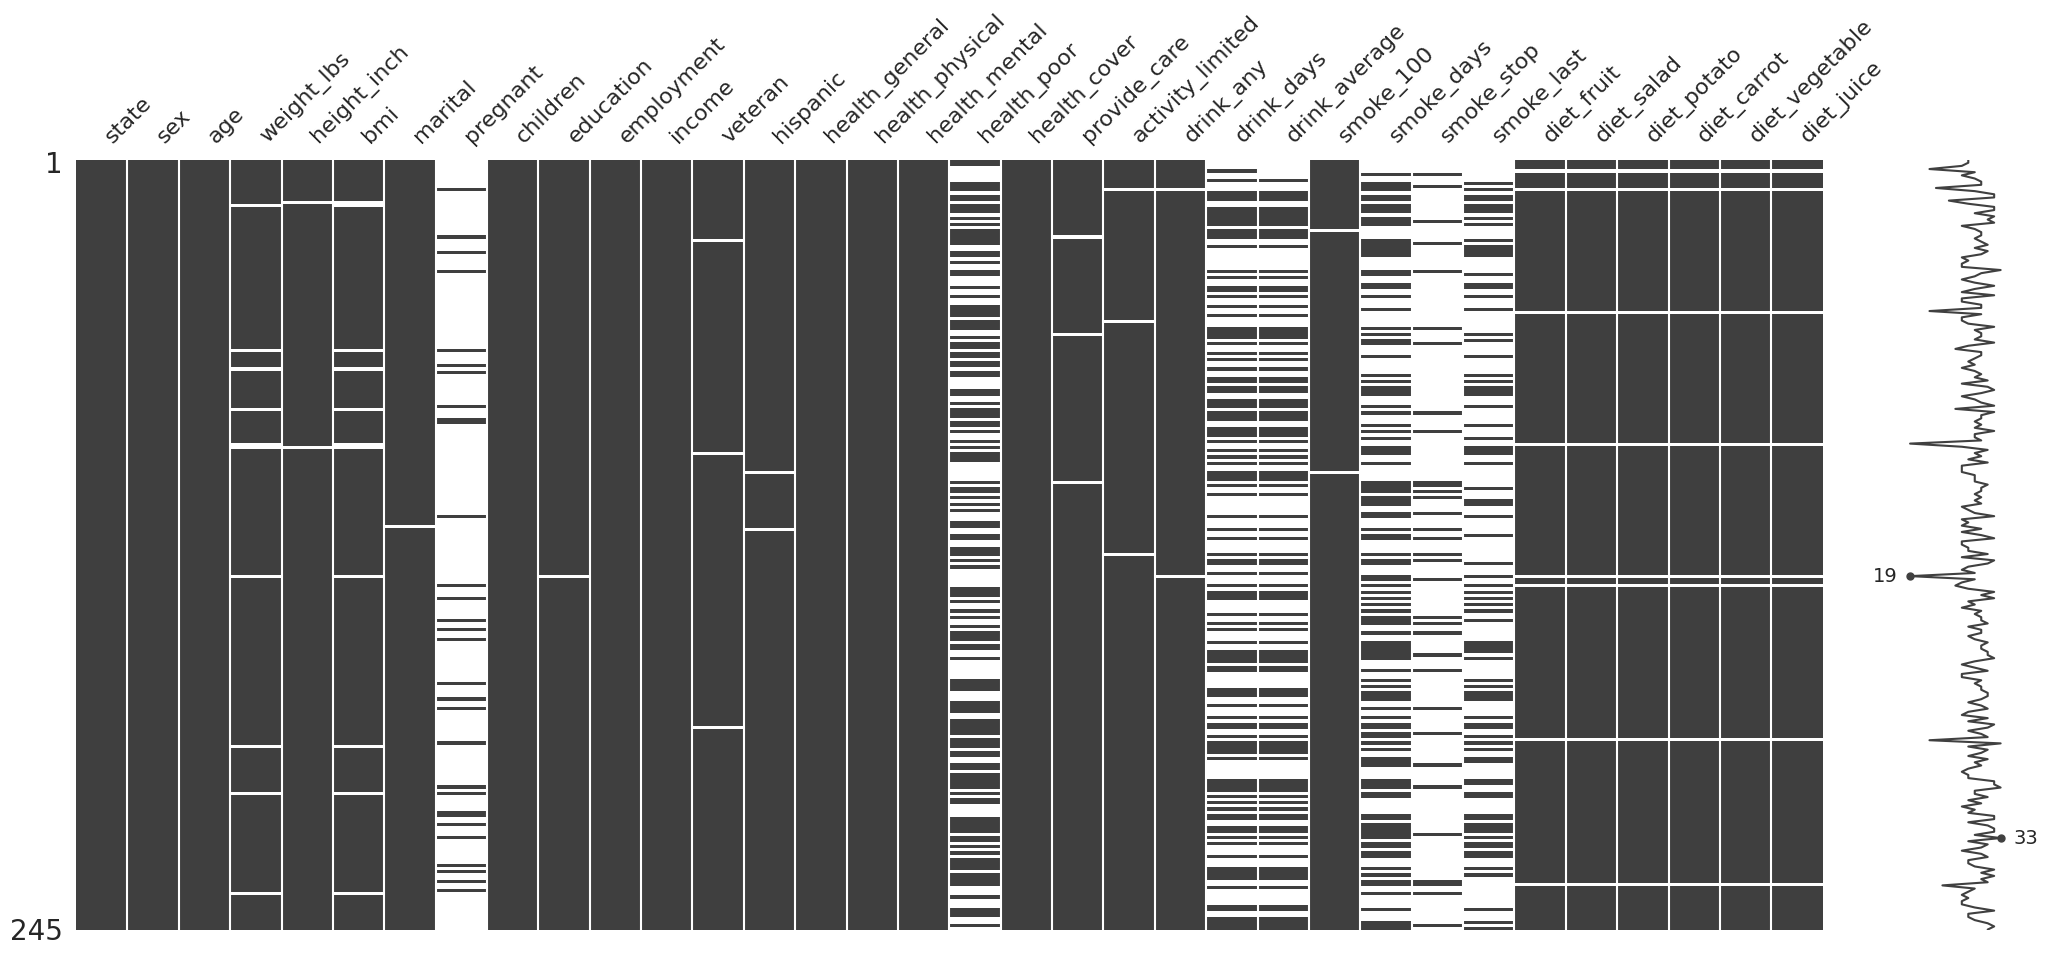

In [45]:
missingno.matrix(riskfactors_df)

<AxesSubplot: >

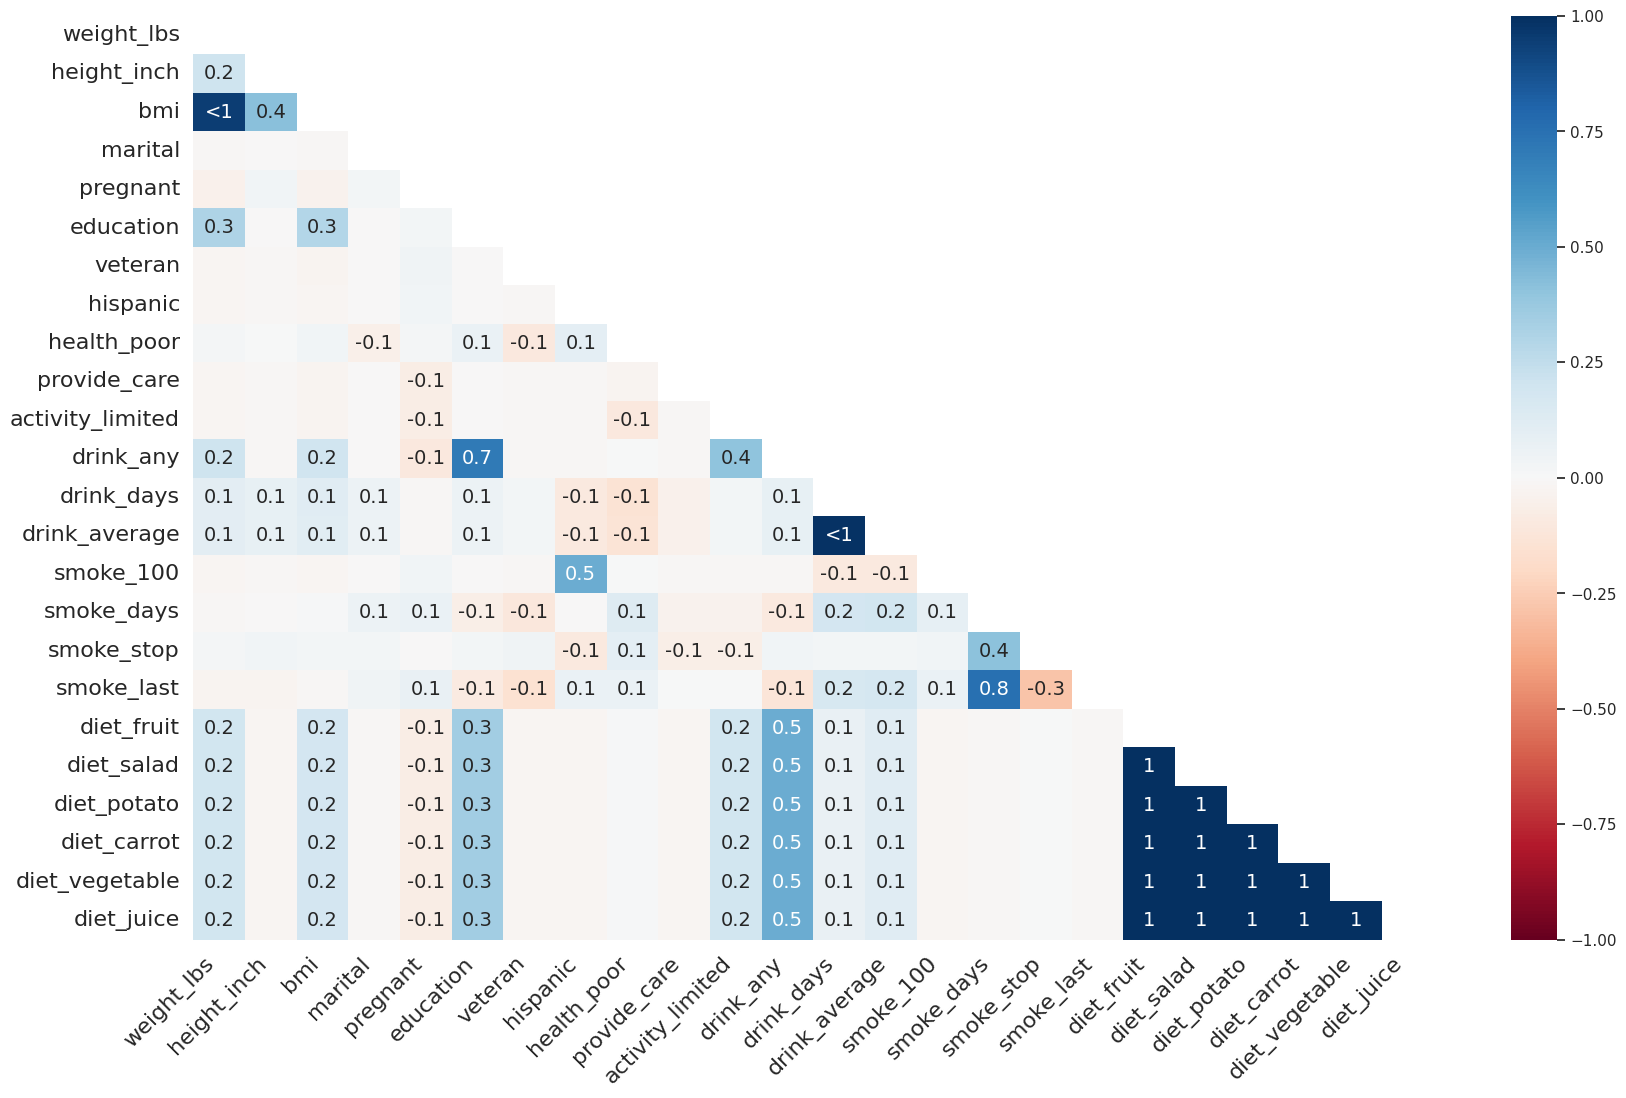

In [46]:
missingno.heatmap(riskfactors_df)

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

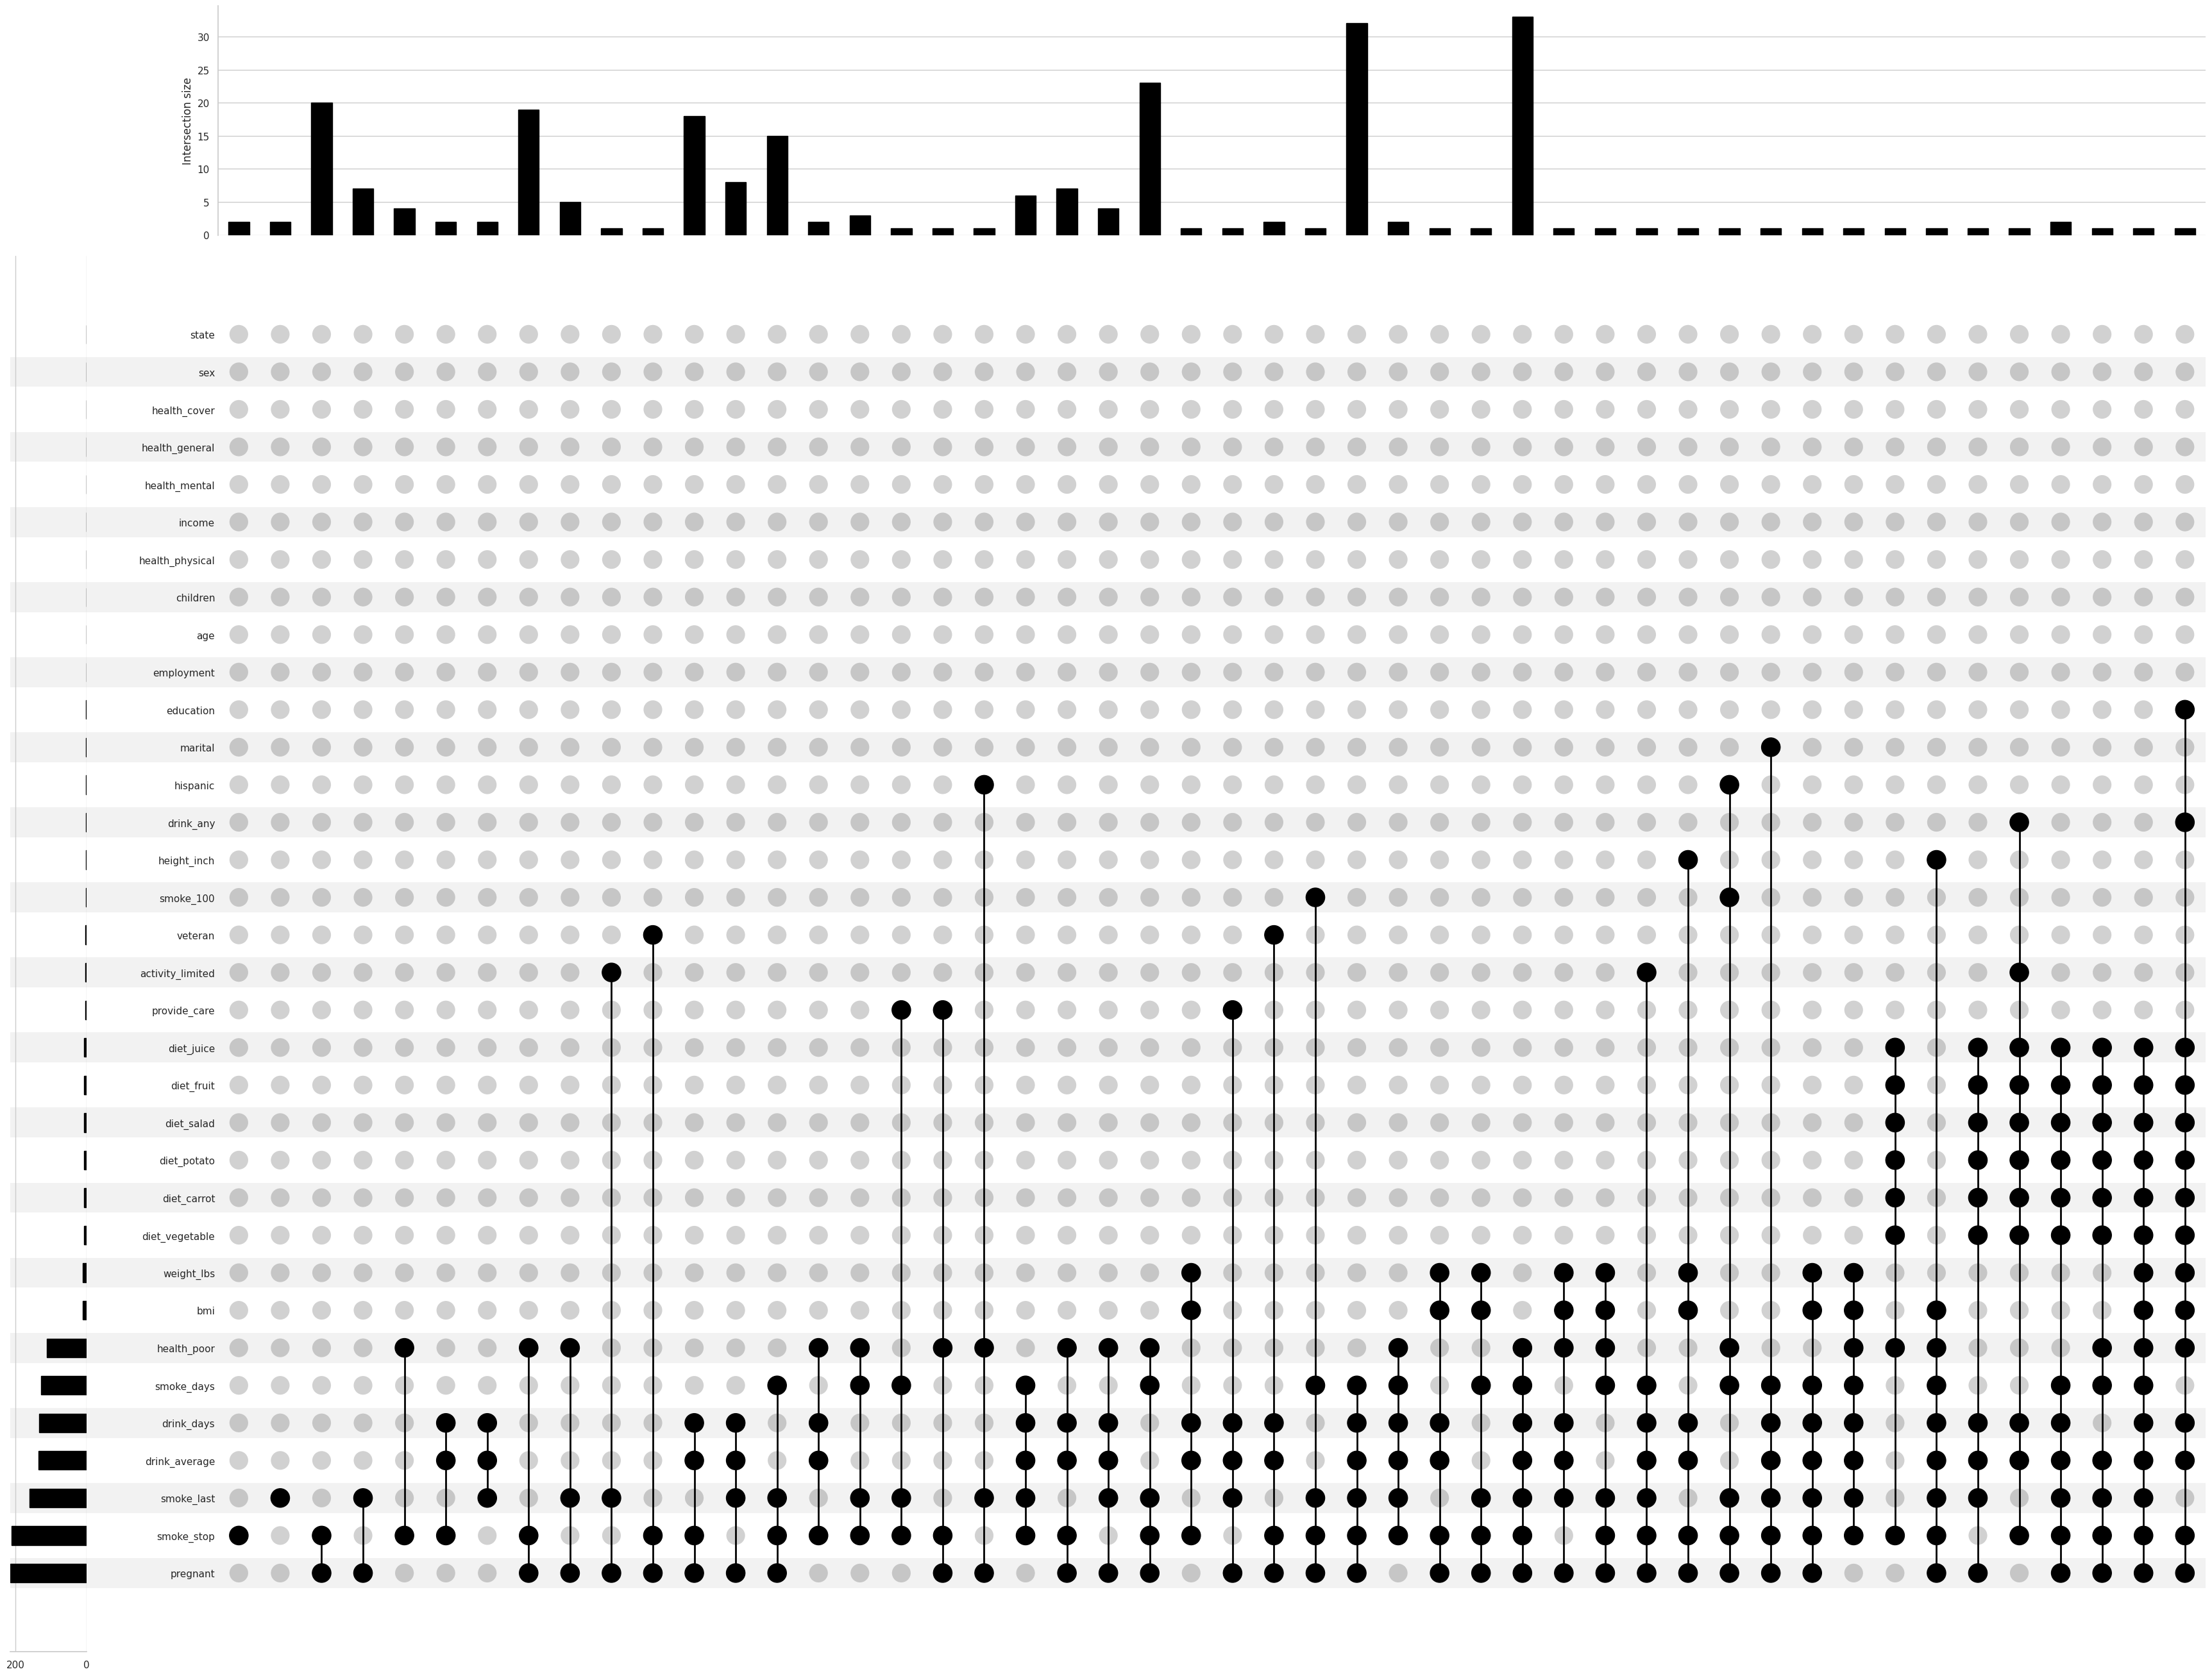

In [50]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables = None,
        element_size = 60
    )
)

{'matrix': <AxesSubplot: >,
 'shading': <AxesSubplot: >,
 'totals': <AxesSubplot: >,
 'intersections': <AxesSubplot: ylabel='Intersection size'>}

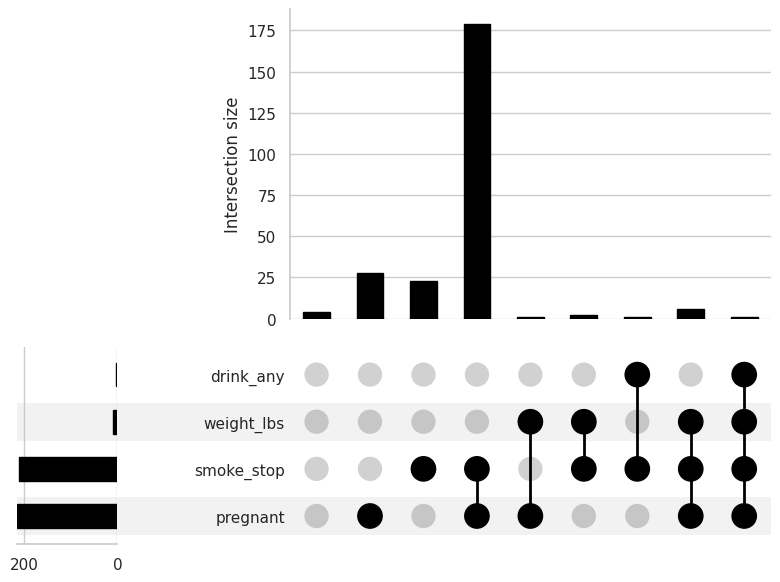

In [52]:
(
    riskfactors_df
    .missing
    .missing_upsetplot(
        variables = ["weight_lbs", "pregnant", "smoke_stop", "drink_any"],
        element_size = 50
    )
)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=8e3578bb-242c-4dfe-99a9-1c9f6db2bee5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>